# Rozkłady $\alpha$-stabilne

## STRESZCZENIE

Projekt polega na analizie rozkładów $\alpha$-stabilnych, które ze względu na swoje własności znajdują zastosowanie w wielu zagadnieniach i problemach matematycznych, fizycznych oraz ekonomicznych. Przykładem może być zaobserwowana przez Mandelbrota cena akcji bawełny czy problem latarni morskiej. W fizyce można się spotkać ze szczególnymi przypadkami zwanymi Landau'a i Holtsmark'a. W poniższej pracy przedstawione zostaną podstawowe własności i zależności rozkładów $\alpha$-stabilnych, które powinien znać każdy aspirujący matematyk z Wydziału Matematyki.

## WSTĘP TEORETYCZNY

Rozkłady $\alpha$-stabilne zwane również Lévy stabilne lub stabilne zostały po raz pierwszy opisane przez francuskiego matematyka Paul'a Lévy'ego(1886-1971). Rozkłady te charakteryzują się „ciężkimi ogonami”, poza jednym wyjątkiem-rozkładem Gaussa. Grube ogony oznaczają, że wariancja i niekiedy wartość oczekiwana nie mogą zostać wyznaczone. Dla przeciętnego człowieka najłatwiej zaznajomić z tymi rozkładami dzięki zajściu Czarnego Poniedziałku(1987)[5]. Gdyby akcje przyjmowały na przykład rozkład normalny wręcz niemożliwy były spadek akcji aż o 22%, natomiast w rozkładach stabilnych (i nie tylko) przyjmowanie skrajnych wartości (czyli duże skoki cen) jest bardziej prawdopodobne.

Rozkład jest $\alpha$-stabilny, jeśli dla dowolnych $a,b > 0$  istnieją  $c>0$ oraz d $\in \mathbb{R}$:

\begin{equation}
 aX_1 + bX_2 \stackrel{d}= \; cX+d, 
\end{equation}

gdzie $X_1$, $X_2$ to niezależne kopie X. [1]

Rozkład $\alpha$-stabilny będzie oznaczony przez $S(\alpha, \beta, \mu, \sigma)$. 

* $\alpha$ to parametr stabilności. $\alpha \in (0, 2]$. 

* $\beta$ to paramert skośności. $\beta \in [-1,1]$.

* $\mu$ to parametr lokalizacji. $\mu \in \mathbb{R}$ 

* $\sigma$ to paramert skali. $\sigma > 0$ 


### Podstawowe własności rozkładów stabilnych

* Funkcja charakterystyczna

\begin{equation}
\phi(\xi) = e^{i\mu\xi-|\sigma\xi|^\alpha(1-i\beta sgn(\xi)\tan{\frac{\pi\alpha}{2}})}, \;\;\alpha \ne 1
\end{equation}

\begin{equation}
\phi(\xi) = e^{i\mu\xi-|\sigma\xi|^\alpha(1+i\beta sgn(\xi)\frac{2}{\pi}\log{|\xi|})}, \;\;\alpha = 1
\end{equation}

- gęstość

Jest określona analitycznie jedynie dla trzech parametrów $\alpha$.

1. dla $\alpha = 2, \beta \in \mathbb{R}, \mu=0, \sigma=\frac{\sqrt{2}}{2}$ to rozkład normalny $\mathcal{N}$(0,1) o gęstości


\begin{equation}
f(x)= \frac{1}{\sqrt{2 \pi}}e^{-\frac{x^2}{2}},
\end{equation}

2. dla $\alpha = 1, \beta=0, \mu=0, \sigma=1$ to rozkład Cauchyego $\mathcal{C}$(0, 1)


\begin{equation}
f(x)=\frac{1}{\pi(1+x^2)},
\end{equation}

3. dla $\alpha = \frac{1}{2}, \beta=1, \mu=0, \sigma=1$ to rozkład Lévy'ego


\begin{equation}
f(x)=\begin{cases}\sqrt{\frac{1}{2\pi}}x^{-\frac{3}{2}}e^{-\frac{1}{2x}} \;\;\; \text{dla} \;\; x>0 \\
0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{dla} \;\;\ x \le 0.
\end{cases}
\end{equation}

* dystrybuanta

Identycznie jak gęstość jest określona jedynie dla trzech szczególnych przypadków podanych powyżej.

1. dla $\alpha = 2, \beta \in \mathbb{R}, \mu=0, \sigma=\frac{\sqrt{2}}{2}$ to rozkład normalny $\mathcal{N}$(0,1) o dystrybuancie


\begin{equation}
F(x)=\frac{1}{2}(1+erf\frac{x}{\sqrt{2}}),
\end{equation}

2. dla $\alpha = 1, \beta=0, \mu=0, \sigma=1$ to rozkład Cauchyego $\mathcal{C}$(0, 1)


\begin{equation}
F(x)=\frac{1}{\pi}\arctan{x}+\frac{1}{2},
\end{equation}

3. dla $\alpha = \frac{1}{2}, \beta=1, \mu=0, \sigma=1$ to rozkład Lévy'ego $\mathcal{Levy}$(0,1)


\begin{equation}
F(x)=erfc(\sqrt{\frac{1}{2x}}),
\end{equation}

gdzie $\;erf\;$ to funkcja błędu, a $\;erfc\;$ to uzupełniająca funkcja błędu.

## 1. Implementacja algorytmu

In [240]:
import numpy as np
from scipy.stats import levy_stable, kstest
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import pylab 
import scipy.stats as stats
from IPython.display import display, Markdown
import math
import mpmath as mp
from operator import add

In [247]:
def alpha_stable(alpha, beta, mu, sigma):
    """
    Funkcja generująca zmienną losową z rozkładu stabilnego o zadanych parametrach
    :param alpha: float from (0, 2]
        parametr stabilności
    :param beta: float from [-1, 1]
        parametr skośności
    :param mu: float
        parametr lokalizacji
    :param sigma: float > 0
        parametr skali
    :return: zmienna losowa z rozkładu S(alpha, beta, mu, sigma)
    """
    U = np.random.uniform(-np.pi/2, np.pi/2)
    E = np.random.exponential(1)
    if alpha != 1:
        S = (1 + beta**2 * (np.tan(np.pi*alpha/2))**2)**(1/(2*alpha))
        B = 1/alpha * np.arctan(beta*np.tan(np.pi*alpha/2))
        X = S * np.sin(alpha * (U + B))/(np.cos(U))**(1/alpha) * (np.cos(U-alpha*(U+B))/E)**((1-alpha)/alpha)
        Y = sigma * X + mu
        return Y
    else:
        X = 2/np.pi*((np.pi/2+beta*U)*np.tan(U)-beta*np.log((np.pi/2*E*np.cos(U))/(np.pi/2 + beta*U)))
        Y = sigma*X+2/np.pi*beta*sigma*np.log(sigma)+mu
        return Y


def alpha_stable_n(alpha, beta, mu, sigma, n):
    """
    Funkcja generująca n zmiennych z rozkładu stabilnego o zadanych parametrach
    :param alpha: float from (0, 2]
        parametr stabilności
    :param beta: float from [-1, 1]
        parametr skośności
    :param mu: float
        parametr lokalizacji
    :param sigma: float > 0
        parametr skali
    :param n: int > 0
        ilość zmiennych do wygenerowania
    :return: zmienna losowa z rozkładu S(alpha, beta, mu, sigma)
    """
    X = []
    for i in range(n):
        X.append(alpha_stable(alpha, beta, mu, sigma))
    return X

## 2. BADANIE POPRAWNOŚCI ALGORYTMU

In [243]:
alpha_1 = 1/2
alpha_2 = 1
alpha_3 = np.sqrt(2)
alpha_4 = 2
alphas = [alpha_1, alpha_2, alpha_3, alpha_4]
beta = 0

In [244]:
X_1 = alpha_stable_n(alpha_1, beta, 0, 1, 1000)
X_2 = alpha_stable_n(alpha_2, beta, 0, 1, 1000)
X_3 = alpha_stable_n(alpha_3, beta, 0, 1, 1000)
X_4 = alpha_stable_n(alpha_4, beta, 0, 1, 1000)
Xs = [X_1, X_2, X_3, X_4]

* <font size=4> histogram danych empirycznych oraz gestość teoretyczna <font>

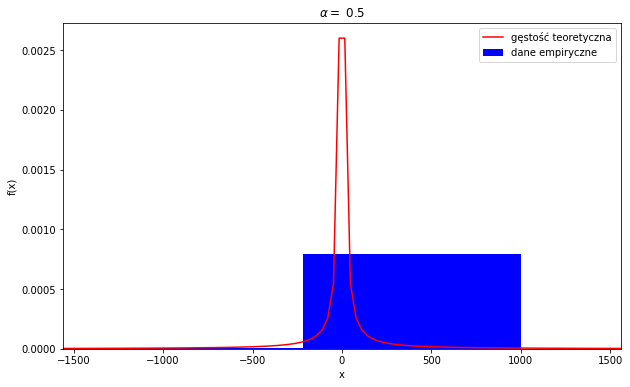

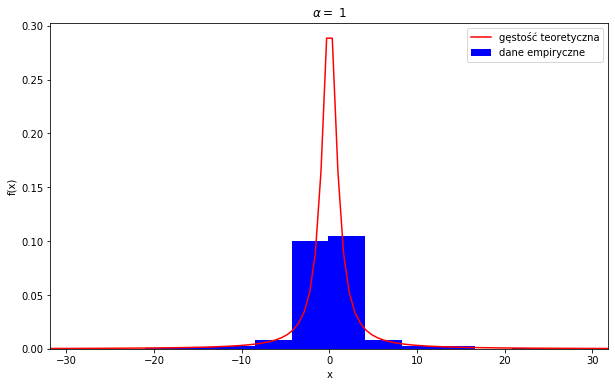

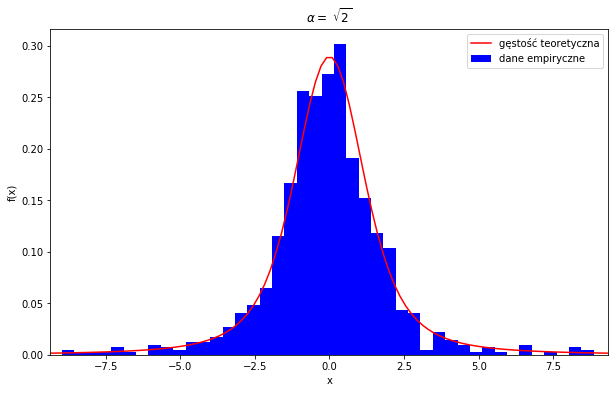

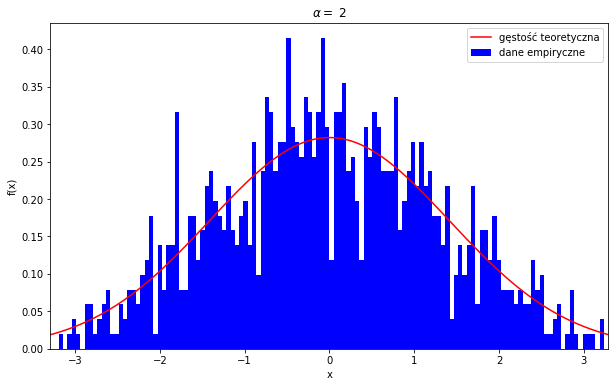

In [248]:
def histogram_plot(XS, alphas, beta):
    """Funkcja pokazująca histogram i gęstość teoretyczną dla wybranych parametrów"""
    x = [0, 0, 0, 0]
    bins_range=[4000, 2000, 200, 70]
    for i in range(4):
        plt.figure(figsize=(10, 6))
        x[i] = np.linspace(levy_stable.ppf(0.01, alphas[i], beta), levy_stable.ppf(0.99, alphas[i], beta), 100)
        plt.plot(x[i], levy_stable.pdf(x[i], alphas[i], beta), 'r-', label='gęstość teoretyczna')
        plt.hist(Xs[i], bins=200, density=True, facecolor='b', label='dane empiryczne')
        plt.title(r'$\alpha=$ {}'.format(alphas[i] if i!=2 else r'$\sqrt{2}$'))
        plt.xlim(min(x[i]), max(x[i]))
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.show()
histogram_plot(Xs, alphas, beta)

* <font size=4> dystrybuanta empiryczna oraz teoretyczna <font>

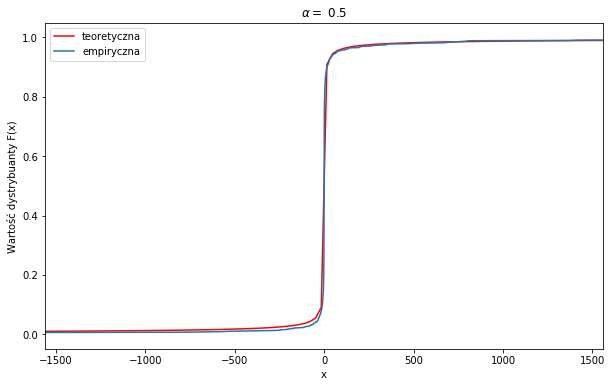

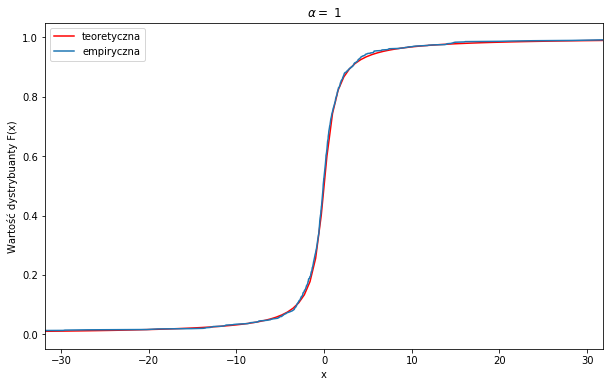

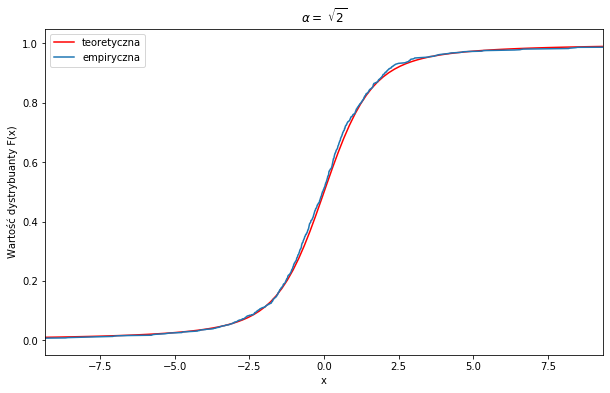

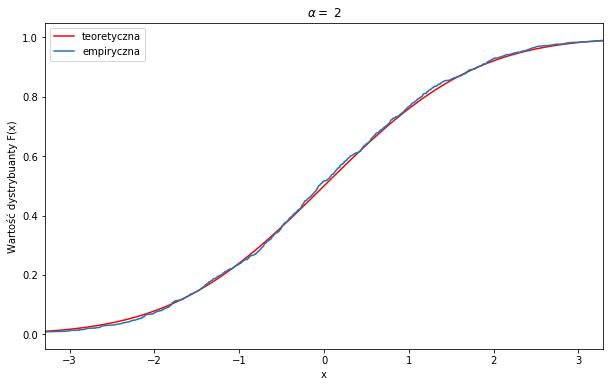

In [249]:
def distribuant_plot(Xs, alphas, beta):
    """Funkjca pokazująca wykresy dystrybuanty empirycznej i teoretycznej dla wybranych rozkładów"""
    x=[0,0,0,0]
    for i in range(4):
        plt.figure(figsize=(10, 6))
        x[i] = np.linspace(levy_stable.ppf(0.01, alphas[i], beta), levy_stable.ppf(0.99, alphas[i], beta), 100)
        plt.plot(x[i], levy_stable.cdf(x[i], alphas[i], beta), 'r', label='teoretyczna')
        ecdf = ECDF(Xs[i])
        plt.plot(ecdf.x, ecdf.y, label='empiryczna')
        plt.xlim(min(x[i]), max(x[i]))
        plt.title(r'$\alpha=$ {}'.format(alphas[i] if i!=2 else r'$\sqrt{2}$'))
        plt.xlabel('x')
        plt.ylabel('Wartość dystrybuanty F(x)')
        plt.legend()
        plt.show()
distribuant_plot(Xs, alphas, beta)

* <font size=4> wykresy kwantylowe <font>

In [250]:
def drawqq(X, distr, alpha, beta, nazwa):
    """Funkcja tworząca wykres kwantylkowy (QQ-plot)
    :param X: próba losowa
    :param distr: jednoargumentowa funkcja o wartosciach w [0,1] 
        (która reprezentuje dystrybuantę teoretyczną F)
    :param alpha: parametr stabilności rozkładu stabilnego
    :param beta: parametr skośności rozkładu stabilnego
    :param nazwa: typ danych"""
    X.sort()
    N = len(X)
    Q = np.ones(N)
    for i in range(0,N):
         Q[i] = distr.ppf(i/N, alpha, beta)
    plt.grid()
    plt.scatter(Q,X,s = 2,color='r')
    x = np.linspace(-20,20,100)
    plt.plot(x,x,color="gray")
    plt.title(r"{} dla $\alpha = $ {}".format(nazwa, r'$\sqrt{2}$' if alpha==np.sqrt(2) else alpha))
    plt.ylabel("Kwantyle empiryczne")
    plt.xlabel("Kwantyle teoretyczne")
    plt.xlim(-15/alpha,15/alpha)
    plt.ylim(-15/alpha,15/alpha)
#     plt.legend()
    plt.show()

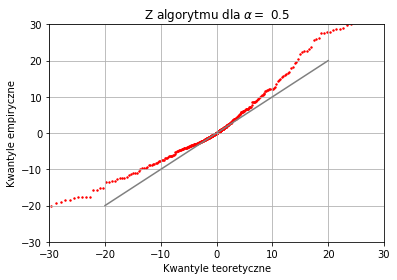

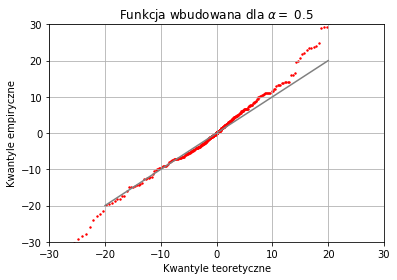

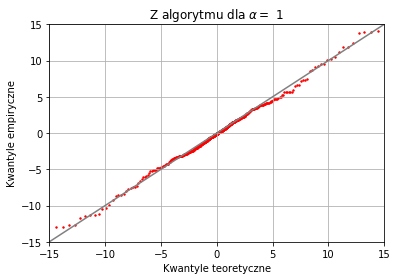

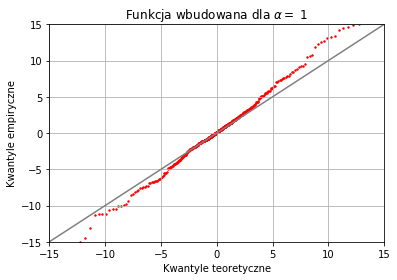

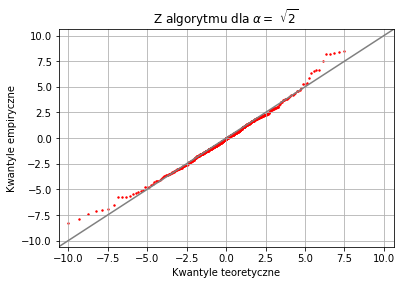

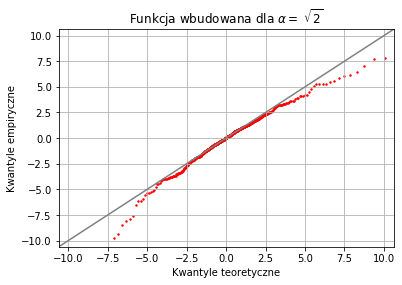

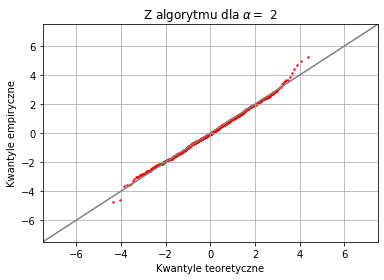

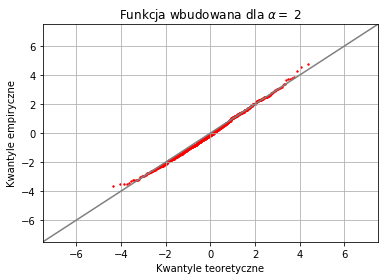

In [251]:
def quantile_plot(Xs, alphas, beta):
    """Funkjca pokazująca wykresy kwantylowe z rozkładu wygenerowanego dzięki wcześniejszemi algorytmowi oraz 
    funkcji wbudowanej dla wybranych rozkładów stabilnych"""
    x=[0,0,0,0]
    X_levy = [levy_stable.rvs(k, beta, size=1000) for k in alphas]
    for i in range(4):
        drawqq(Xs[i], levy_stable, alphas[i], beta, 'Z algorytmu')
        drawqq(X_levy[i], levy_stable, alphas[i], beta, 'Funkcja wbudowana')
quantile_plot(Xs, alphas, beta)

* <font size=4> testy zgodności <font>

In [252]:
def tests(Xs, alphas, beta):
    """Test Kołgomorowa-Smirnowa dla wygenerowanych prób"""
    for i in range(4):
        test_percent = []
        for j in range(10):
            test_percent.append(1 if kstest(Xs[i], 'levy_stable',(alphas[i], beta)).pvalue>0.05 else 0)
        test_percent = sum(test_percent)*10
        display(Markdown(r'Test zgodności Kołgomorowa-Smirnowa dla $\alpha=${}  i  $\beta=${}.Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w {}% przypadków.'.format(alphas[i] if i!=2 else r'$\sqrt{2}$',beta, test_percent)))
        
tests(Xs, alphas, beta)

Test zgodności Kołgomorowa-Smirnowa dla $\alpha=$0.5  i  $\beta=$0.Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w 100% przypadków.

Test zgodności Kołgomorowa-Smirnowa dla $\alpha=$1  i  $\beta=$0.Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w 100% przypadków.

Test zgodności Kołgomorowa-Smirnowa dla $\alpha=$$\sqrt{2}$  i  $\beta=$0.Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w 100% przypadków.

Test zgodności Kołgomorowa-Smirnowa dla $\alpha=$2  i  $\beta=$0.Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w 100% przypadków.

* <font size=4> funkcja charakterystyczna empiryczna oraz teoretyczna<font>

In [253]:
def empchar(X,dzeta):
    """
    Funkcja wyznaczająca wartość funkcji charakterystycznej rozkładu X w punkcie dzeta
    :param X: list
        próba losowa
    :param dzeta: float > 0
        punkt do obliczenia wartości
    :return: wartość funkcji charakterystycznej w punkcie
    """
    if dzeta <= 0:
        raise ValueError("dzeta must be grater than zero")
    Y = [np.exp(1j*dzeta*x) for x in X]
    EY = np.mean(Y)
    return EY

sign = lambda x: x and (1, -1)[x<0]

def teochar_levy_stable(alph, beta, t, mu=0, sigma=1):
    """
    Funkcja obliczająca funckję charakterystyczną z rozkładu stabilnego o zadanych parametrach
    :param alph: float from (0, 2]
        parametr stabilności
    :param beta: float from [-1, 1]
        parametr skośności
    :param t: float > 0
        parametr czasu
    :param mu: float, optional
        parametr lokalizacji
    :param sigma: float > 0, optional
        parametr skali
    :return:teoretyczna wartość funkcji charakterystycznej rozkładu stabilnego
    """
    if alph == 1:
        phi = np.exp(1j*mu*t-(abs(sigma*t))**alph*(1+1j*beta*sign(t)*2/np.pi*np.log(abs(t))))
    else:
        phi = np.exp(1j*mu*t-(abs(sigma*t))**alph*(1-1j*beta*sign(t)*np.tan(np.pi*alph/2)))
    return phi

Porównanie wykresów funkcji charaketystycznej

/home/nina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  app.launch_new_instance()


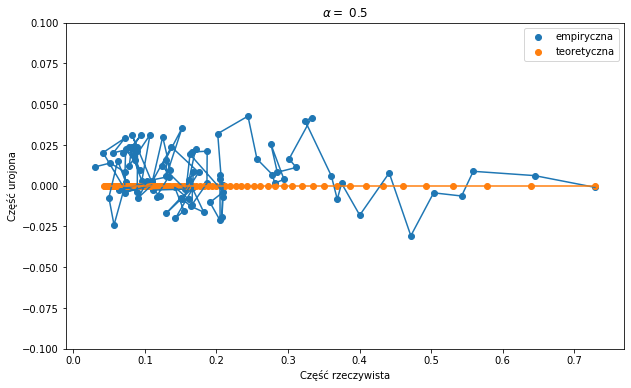

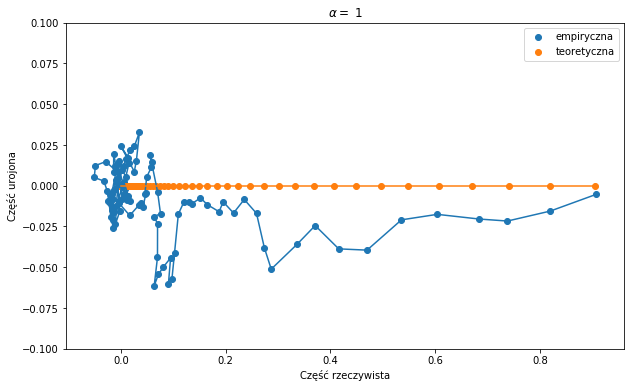

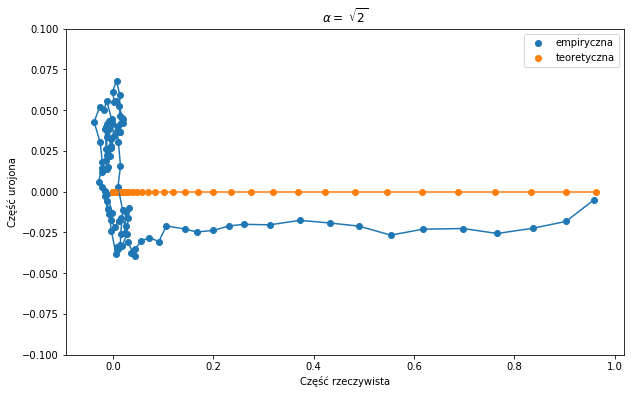

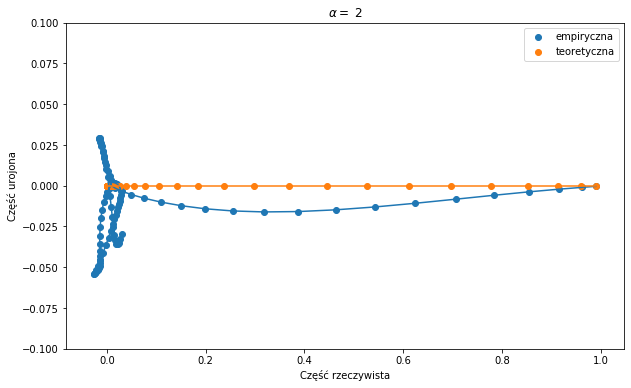

In [254]:
T = np.arange(0.1, 10, 0.1)
def char_func_plot1(Xs, alphas, beta, T):
    """Funkcja pokazuje wykresy funkcji charakterystycznej próby z wybranego rozkładu stabilnego 
    oraz jej teoretyczny odpowiednik. Na poziomej osi część rzeczywista, na pionoewj osi część urojona"""
    for i in range(4):
        emp_unif = [empchar(Xs[i], t) for t in T]
        xs_emp_unif = [value.real for value in emp_unif]
        ys_emp_unif = [value.imag for value in emp_unif]
        teo_unif = [teochar_levy_stable(alphas[i], beta, t) for t in T]
        xs_teo_unif = [value.real for value in teo_unif]
        ys_teo_unif = [value.imag for value in teo_unif]

        plt.figure(figsize=(10, 6))
        plt.scatter(xs_emp_unif, ys_emp_unif, label='empiryczna')
        plt.plot(xs_emp_unif, ys_emp_unif)
        plt.scatter(xs_teo_unif, ys_teo_unif, label='teoretyczna')
        plt.plot(xs_teo_unif, ys_teo_unif)
        plt.title(r'$\alpha=$ {}'.format(r'$\sqrt{2}$' if i==2 else alphas[i]))
        plt.ylim(-0.1, 0.1)
        plt.xlabel('Część rzeczywista')
        plt.ylabel('Część urojona')
        plt.legend()
        plt.show()

char_func_plot1(Xs, alphas, beta, T)

Wykresy przedstawiające część rzeczywistą i urojoną w zależności od czasu

/home/nina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  app.launch_new_instance()


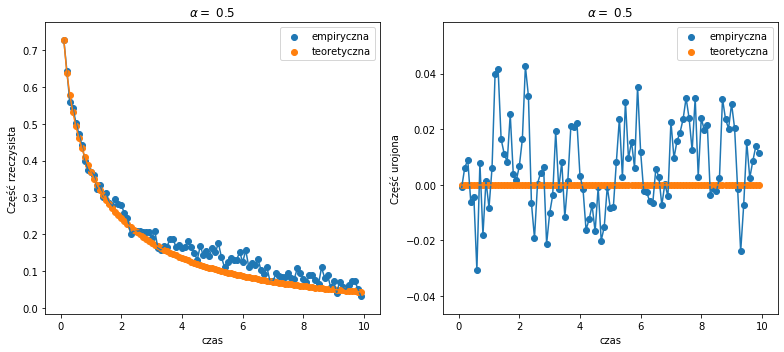

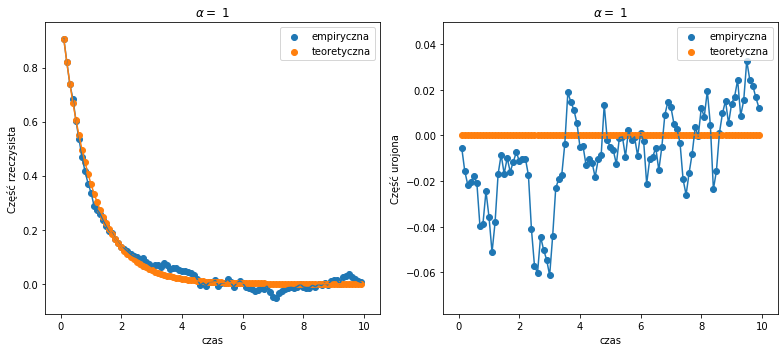

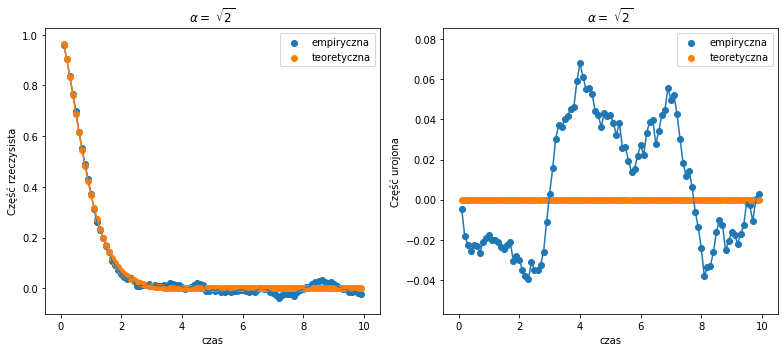

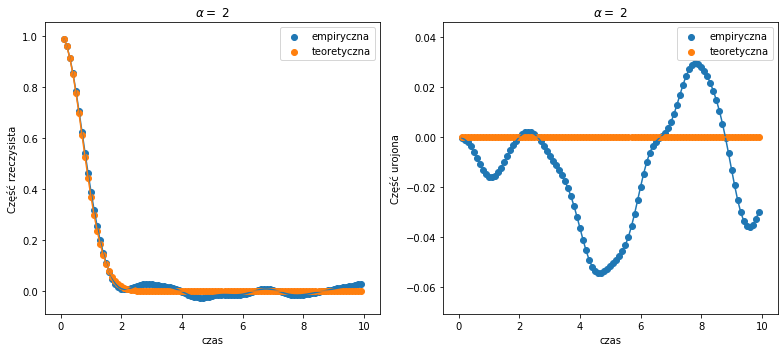

In [255]:
T = np.arange(0.1, 10, 0.1)
def char_func_plot2(Xs, alphas, beta, T):
    """Funkcja pokazuje wykresy funkcji charakterystycznej próby z wybranego rozkładu stabilnego 
    oraz jej teoretyczny odpowiednik. Na lewym wykresie część rzeczywista w zależności od czasu, 
    na prawej część urojona w zależności od czasu"""
    for i in range(4):
        emp_unif = [empchar(Xs[i], t) for t in T]
        xs_emp_unif = [value.real for value in emp_unif]
        ys_emp_unif = [value.imag for value in emp_unif]
        teo_unif = [teochar_levy_stable(alphas[i], beta, t) for t in T]
        xs_teo_unif = [value.real for value in teo_unif]
        ys_teo_unif = [value.imag for value in teo_unif]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
        ax1.scatter(T, xs_emp_unif, label='empiryczna')
        ax1.plot(T, xs_emp_unif)
        ax1.scatter(T, xs_teo_unif, label='teoretyczna')
        ax1.plot(T, xs_teo_unif)
        ax1.set_ylabel('Część rzeczysista')
        ax1.set_xlabel('czas')
        ax1.set_title(r'$\alpha=$ {}'.format(r'$\sqrt{2}$' if i==2 else alphas[i]))
        ax1.legend()

        ax2.scatter(T, ys_emp_unif, label='empiryczna')
        ax2.plot(T, ys_emp_unif)
        ax2.scatter(T, ys_teo_unif, label='teoretyczna')
        ax2.plot(T, ys_teo_unif)
        ax2.set_xlabel('czas')
        ax2.set_ylabel('Część urojona')

        ax2.set_title(r'$\alpha=$ {}'.format(r'$\sqrt{2}$' if i==2 else alphas[i]))
        plt.tight_layout()
        plt.legend()
        plt.show()

char_func_plot2(Xs, alphas, beta, T)

W każdym podpunkcie dane empiryczne i teoretyczne lekko odbiegają od siebie, jednak są to na tyle małe wartości, że mozna uznać zgodność tych rozkładów. POtwierdza to test Kołgomorowa-Smirnowa, który przechodzi 10/10 próbek z każdego rozkładu.

## 3. Obszary przyciagania rozkładów $\alpha$-stabilnych

Rozkład $\mathcal{R}$ należy do obszaru przyciągania rozkładu $\alpha$-stabilnego $S(\alpha, \beta, \mu, \sigma)$, gdy dla ciągu $X_1, X_2$,...      i.i.d. *R* istnieją ciągi stałych $a_n \in \mathbb{R}, b_n>0 $, takie, że [2]


\begin{equation}
\frac{X_1+...+X_n-a_n}{b_n}\xrightarrow[n\rightarrow \infty]{d} Y
\end{equation}


\begin{equation}
Y \sim S(\alpha, \beta, \mu, \sigma).
\end{equation}

Warunki konieczne i wystarczające należenia do obszaru przyciągania rozkładu $\alpha$-stabilnego [2]:

Rozkład $\mathcal{R}$ należy do obszaru przyciągania rozkładu $\alpha$-stabilnego $S(\alpha, \beta, \mu, \sigma) \text{ z }\alpha \in (0,2) $ wtedy i tylko wtedy, gdy 

\begin{equation}
\forall_{y>0} \;\;\; \lim_{x\rightarrow{\infty}}\frac{F(-xy)+1-F(xy)}{F(-x)+1-F(x)}=y^{-\alpha}.
\end{equation}
przy czym muszą istnieć granice
\begin{equation}
\lim_{x\rightarrow{\infty}}\frac{1-F(x)}{F(-x)+1-F(x)} \text{   oraz   } \lim_{x\rightarrow{\infty}}\frac{F(-x)}{F(-x)+1-F(x)},
\end{equation}

gdzie F(x) to dystrybuanta rozładu $\mathcal{R}$.

Rozkład $\mathcal{R}$ należy do obszaru przyciągania rozkładu normalnego wtedy i tylko wtedy, gdy 
\begin{equation}
\alpha =2 \;\;\; \wedge \;\;\; \forall_{y>0} \lim_{x\rightarrow \infty}\frac{\int_{|t|<xy}t^2dF(t)}{\int_{|t|<xy}t^2dF(t)}=1.
\end{equation}


W tej części za pomocą symulacji sprawdzona zostanie prawdziwość stwierdzenia: symetryczny rozkład Pareto z parametrem $\alpha$ należy do obszaru przyciągania pewnego rozkładu $\alpha$-stabilnego z tym samym parametrem $\alpha$. Wykorzystane w celu zostanie uogólnione Centralne Twierdzenie Graniczne (CTG).

Generator liczb z rozkładu Pareto o dystrybuancie $F(x)=1-\frac{1}{(1+Ax)^\alpha}$, gdzie $A>0$, $\alpha \in (0,2)$, $x>0$. Wykorzystana została metoda odwracania dystrybuanty.

In [256]:
def Pareto(alpha, A, N=100):
    """
    Funkcja generująca N zmiennych z rozkładu Pareto o zadanych parametrach
    :param alpha: float from (0, 2)
        parametr stabilności
    :param A: float >0 
        parametr dystrybuanty
    :param N: int > 0, optional
        ilość zmiennych do wygenerowania
    :return: N zmiennych losowych z rozkładu Pareto
    """
    U = np.random.uniform(0,1, size=N)
    X = [((1-y)**(-1/alpha)-1)/A for y in U]
    return X

Poniżej test -- porównanie histogramu rozkładu Pareto i jego gęstości teoretycznej

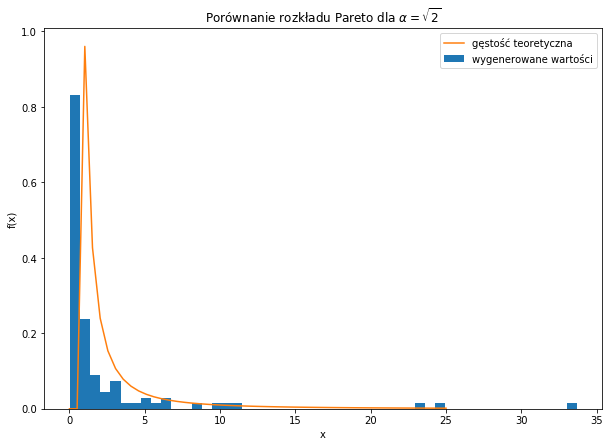

In [257]:
def test_Pareto():
    """Funkcja pokazująca histogram danych z wygenerowanego rozkładu Pareto oraz teoretyczną gęstość"""
    plt.figure(figsize=(10, 7))
    plt.hist(Pareto(np.sqrt(2), 1),bins=50, density=True, label='wygenerowane wartości')
    plt.plot(np.linspace(0, 25), stats.pareto.pdf(np.linspace(0, 25), 1), label='gęstość teoretyczna')
    plt.title(r'Porównanie rozkładu Pareto dla $\alpha = \sqrt{2}$')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    
test_Pareto()

Definicja rozkładu Pareto w module scipy.stats jest inna niż podana nam dystrybuanta. Wbudowany generator Pareto jest zdefiniowany jedynie dla $x\geq 1$. Wynika z tego, ze test napsanej funkcji Pareto nie były miarodajny. Już po wykresie widać inne określenie rozkładu.

Modyfikacja generatora rozkładu Pareto na generator liczb z symetrycznego rozkładu Pareto.

In [258]:
def symetric_Pareto(alpha, A, N=100):
    """
    Funkcja generująca N zmiennych z rozkładu symetrycznego Pareto o zadanych parametrach
    :param alpha: float from (0, 2)
        parametr stabilności
    :param A: float >0 
        parametr rozkładu
    :param N: int > 0, optional
        ilość zmiennych do wygenerowania
    :return: N zmiennych losowych z rozkładu symetrycznego Pareto
    """
    U = [Pareto(alpha, A, N=1)[0] if np.random.uniform(0, 1)>0.5 else -Pareto(alpha, A, N=1)[0] for i in range(N)]
    return U

Poniżej przedstawiony został histogram wygenerowanych wartości z rozkładu symetrycznego Pareto. Python nie ma wbudowanych funckji dla rozkładu symetrycznego Pareto, a przekształecenie funkcji dla niesymetrycznego nie wygląda dobrze.

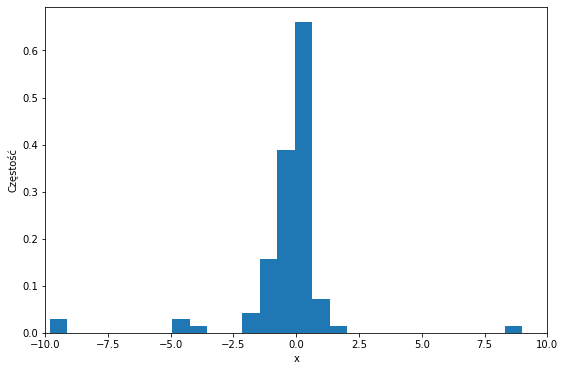

In [259]:
def sym_Pareto_plot():
    """Funkjca plotujaca symetryczny rozkład Pareto-sprawdzenie czy faktycznie są generowane odpowiednie wartości"""
    plt.figure(figsize=(9, 6))
    plt.hist(symetric_Pareto(1, 3, 100), density=True, bins=50)
    plt.xlim(-10, 10)
    plt.xlabel('x')
    plt.ylabel('Częstość')
    plt.show()
    
sym_Pareto_plot()

### Uogólnione Centralne Twierdzenie Graniczne (CTG) brzmi:

Niech $X_i, \; i \in \{0,1,...,n\}$  mają rozkład i.i.d. z nieokreślonym drugim momentem. Wtedy
\begin{equation}
    \sum_{i=1}^n X_i \xrightarrow[n \rightarrow \infty]{d} S,
\end{equation}
dla pewnego rozkładu stabilnego S.

Chcąc sprawdzić powyższe twierdzenie dla symetrycznego rozkładu Pareto należy zastosować poniższy algorytm.

In [260]:
def CTG_simulation(X, A, alpha):
    """
    Funkcja generująca zmienną z przekształconego rozkładu Pareto
    :param X: function
        próba losowa z rozkładu symetrycznego Pareto
    :param A: float > 0 
        parametr dystrybuanty rozkładu Pareto
    :param alpha: float from (0, 2)
        parametr stabilności
    :return: zmiennya losowa z przekształconego rozkładu Pareto
    """
    c_inf = 2/A**alpha
    c_aa = 2*math.gamma(alpha)*np.sin(np.pi*alpha/2)/(np.pi*c_inf)
    ctg = c_aa*sum(X)/(len(X))**(1/alpha)
    return ctg
        


def CTG_simulation_n(X, A, alpha, N=100):
    """
    Funkcja generująca N zmiennych losowych z przekształconego rozkładu Pareto
    :param X: function
        próba losowa z rozkładu symetrycznego Pareto
    :param A: float > 0 
        parametr dystrybuanty rozkładu Pareto
    :param alpha: float from (0, 2)
        parametr stabilności
    :param N: int >0, optional
        ilość danych wygenerowanych
    :return: lista N zmiennych losowych z przekształconego rozkładu Pareto
    """
    Y = []
    for i in range(N):
        Y.append(CTG_simulation(X(alpha, A, 100), A, alpha))
    return Y


def cdf_Pareto(x, A, alpha):
    return 1-1/(1+A*x)**(alpha)

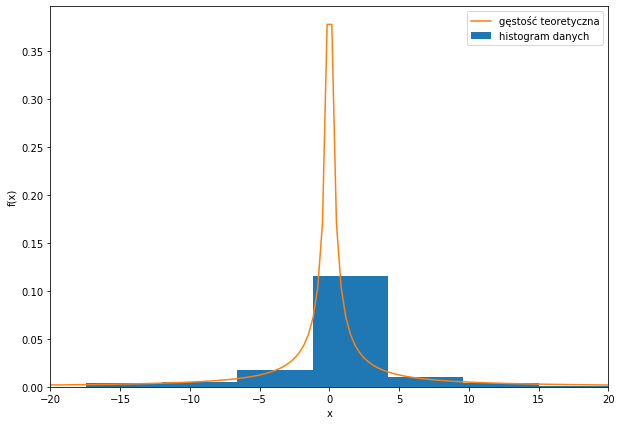

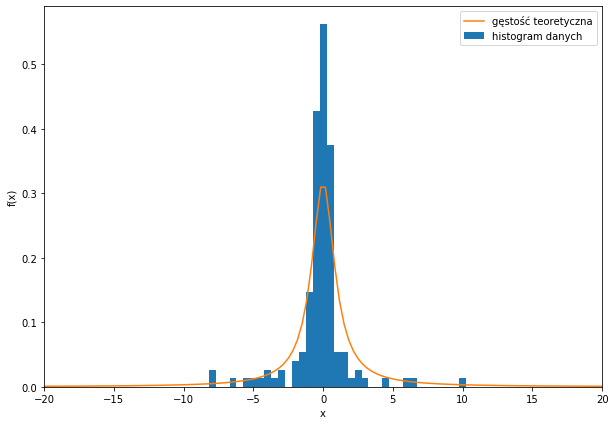

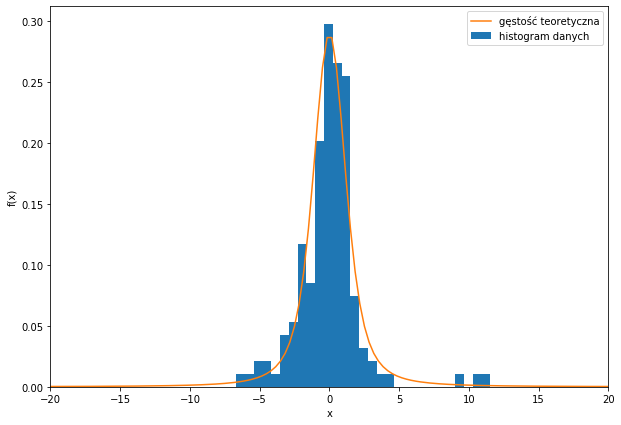

In [262]:
def CTG_visualization(alphas, beta):
    """Funkcja pokazuje histogram i teoretyczną gestość danych wygenerowanych do uogólnionego CTG"""
    Ctg_data = [0, 0, 0, 0]
    As = [1, 10, 7]
    bins_range = [4000, 120, 70]
    for i in range(3):
        plt.figure(figsize=(10, 7))
        Ctg_data[i] = CTG_simulation_n(symetric_Pareto, As[i], alphas[i], N=150)
        plt.hist(Ctg_data[i], bins=bins_range[i], density=True, label='histogram danych')
        x =np.linspace(-50, 50, 300)
        plt.plot(x, stats.levy_stable.pdf(x, alphas[i], 0), label='gęstość teoretyczna')
        plt.xlim(-20, 20)
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.show()
    return Ctg_data
        
Ctg_data = CTG_visualization(alphas, beta)

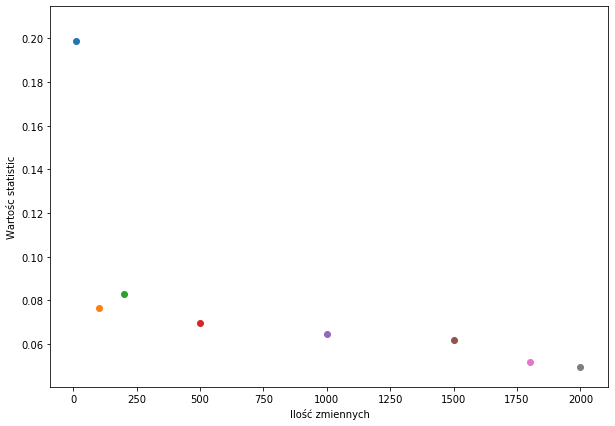

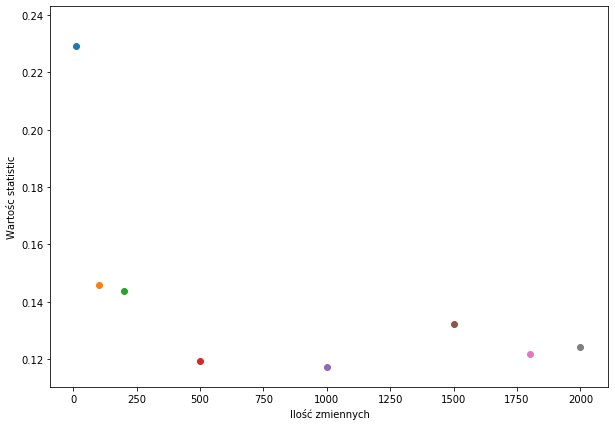

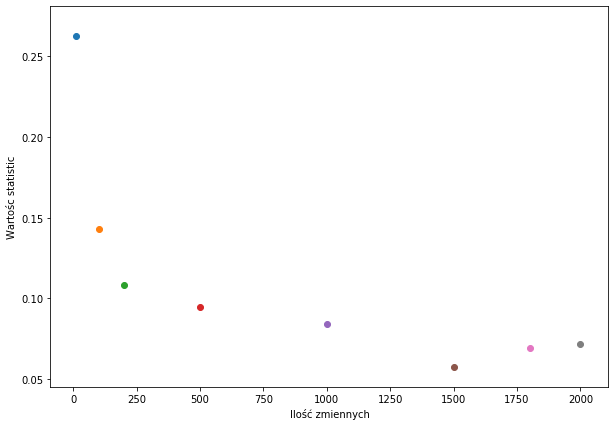

In [263]:
def statistic_test(alphas):
    """Funkcja pokazuje wykresy szybkość zbieżności rozkładu Pareto do pewnego rozkładu stabilnego"""
    As = [1, 10, 7]
    for  i in range(3):
        plt.figure(figsize=(10, 7))
        for  j in [10, 100, 200, 500, 1000, 1500, 1800, 2000]:
            test_result = kstest(CTG_simulation_n(symetric_Pareto, As[i], alphas[i], N=j), 'levy_stable',(alphas[i], 0)).statistic
            plt.scatter(j, test_result)
        plt.xlabel('Ilość zmiennych')
        plt.ylabel('Wartośc statistic')
        plt.show()
        
statistic_test(alphas)

Powyższe wykresy przedstawiają wartość parametru statistic wbudowanego testu Kołgomorowa-Smirnowa kstest. Można zauważyć, że im więcej generujemy zmiennych rozkłady te są bardziej podobne do siebie.

In [264]:
def ctg_test(Ctg_data, alphas, beta):
    """Funkcja wyświetla komunikat o zgodności rozkładów"""
    beta = 0
    for i in range(3):
        test = kstest(Ctg_data[i], 'levy_stable',(alphas[i], beta)).pvalue>0.05
        display(Markdown(r'Test zgodności Kołgomorowa-Smirnowa dla $\alpha=${}  i  $\beta=${}.Badana próbka{}jest zgodna z rozkładem levy-stable dla danych parametrów'.format(alphas[i] if i!=2 else r'$\sqrt{2}$',beta, ' nie ' if test ==False else ' ')))

ctg_test(Ctg_data, alphas, beta)

Test zgodności Kołgomorowa-Smirnowa dla $\alpha=$0.5  i  $\beta=$0.Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów

Test zgodności Kołgomorowa-Smirnowa dla $\alpha=$1  i  $\beta=$0.Badana próbka nie jest zgodna z rozkładem levy-stable dla danych parametrów

Test zgodności Kołgomorowa-Smirnowa dla $\alpha=$$\sqrt{2}$  i  $\beta=$0.Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów

Początkowo test nie działał dla przypadu $\alpha=\frac{1}{2}$ oraz $\alpha=1$. Po krótkich eksperymentach okazało się, że należy dopasować parametr A funkcji CTG_simulation_n, by nie można było odrzucić zerowej hipotezy, mówiącej, że wyjściowy rozkład jest identyczny z rozkładem $\alpha$-stabilnym dla tej samej wartości $\alpha$. W powyższej wersji pararametry są dopasowane, by rozkłady były możliwie zgodne.

In [265]:
def ctg_percentage_test(Ctg_data, alphas):
    """Funkcja wyświetla konmunikat o procencie przechodzonych testów dla trzech rozkładów"""
    test_results = []
    As = [1, 1, 7]
    for i in range(3):
        percent_test = []
        for j in range(100):
            Ctg_data[i] = CTG_simulation_n(symetric_Pareto, As[i], alphas[i])
            test = kstest(Ctg_data[i], 'levy_stable',(alphas[i], 0)).pvalue > 0.05
            percent_test.append(1 if test else 0)
        test_results.append(sum(percent_test))
        display(Markdown(r'Test zgodności dla $\alpha=${} i $\beta=${}. Badana próbka jest zgodna w {}% generacji.'.format(alphas[i] if i!=2 else r'$\sqrt{2}$',beta, test_results[i])))
        
ctg_percentage_test(Ctg_data, alphas)

Test zgodności dla $\alpha=$0.5 i $\beta=$0. Badana próbka jest zgodna w 81% generacji.

Test zgodności dla $\alpha=$1 i $\beta=$0. Badana próbka jest zgodna w 17% generacji.

Test zgodności dla $\alpha=$$\sqrt{2}$ i $\beta=$0. Badana próbka jest zgodna w 91% generacji.

Widać, że przy $\alpha$=1/2 testy przechodzi 87%próbek, natomiast dla $\alpha=\sqrt{2}\;\;$   82% próbek jest zgodna z rozkładem stabilnym o takiej samej wartości $\alpha$. Poniższy kod sprawdza zachowanie CTG dla $\alpha=1$ oraz $A \in \{1, 2, ..49\}$, ponieważ 18% przechodzonych testów nie jest wystarczająca.

In [266]:
def A_for_alpha1(Ctg_data, alphas):
    """Funkcja wyświetla liczby, dla których test wyszedł pozytywnie w przynajmniej 5/10 przypadków"""
    li = []
    for k in range(1, 50):
        cc = []
        for i in range(10):
            Ctg_data[1] = CTG_simulation_n(symetric_Pareto, k, alphas[1])
            test = kstest(Ctg_data[1], 'levy_stable',(alphas[1], 0)).pvalue >0.05
            cc.append(1 if test else 0)
        li.append(sum(cc)*10)
    for i in range(len(li)):
        if li[i]>=50:
            print(i,'uzyskało', li[i], '%')

A_for_alpha1(Ctg_data, alphas)

0 uzyskało 60 %
4 uzyskało 50 %
18 uzyskało 50 %


Jak widać przy $\alpha$ = 1 nie udało się znaleźć takiego A z naturalnych z przedziału(1, 49) , by procent przechodzonych testów był większy niz 60. Prawdopodobnie wartość A jest pewnym ułamkiem, ponieważ przy większych liczbach test wychodzi gorzej. Inną hipotezą jest pewna niepoprawność kodu, która uniemożliwia właściwą generację rozkładu stabilnego z rozkładu symetrycznego Pareto. Po dłuższej analizie pojawił się problem -- również ilość wygenerowanych próbek z algorytmu CTG_simulation wpływa na generację danych, a co za tym idzie na wyniki testu. Na przykład dla N=100 test przechodzi jedynie $\alpha=\sqrt{2}$, a dla N=130 oraz $\alpha=\frac{1}{2}$ przechodzi az 89% testów. Problemem musi być algorytm -- przy większej ilości generacji np. N=1000 wszystkie wartości $\alpha$ powinny przechodzić test, jednak tak nie jest. Zastanawiające jest jednak to, że parametr statistic z funkcji kstest jest zbieżny do 0 przy wzroście wywołań, natomiast wartośc parametru pvalue implikuje niezgodność danych rozkładów.

## 4. Nieskończona podzielnośc rozkładów zmiennych ściśle stabilnych

Zmienna ma rozkład ściśle stabilny, jeśli dla dowolnych $a,b > 0$  istnieje  $c>0$ takie, że

\begin{equation}
 aX_1 + bX_2 \stackrel{d}= \; cX, 
\end{equation}

gdzie $X_1$, $X_2$ to niezależne kopie X. [3]

Rozkład jest nieskończenie podzielny, gdy dla każdego $n \in \mathrel{N}$ możliwe jest przedstawienie go poprzez rozkład sumy $n$ niezależnych zmiennych losowych o takim samym rozkładzie.

Przykładem rozkładu nieskończenie podzielnego są rozkłady $S(2, 0, 0, 1)$--rozkład normalny, $S(1, 0, 0, 1)$--rozkład Cauchy'ego czy też $S(3/2, 0, 0, 1)$--rozkład Holtsmarka, $S(1/2, 0, 0, 1)$--rozkład Lévy'ego [6].

* Sprawdzenie dla rozkładu $\alpha$-stabilnego $S(\sqrt{2}, 0, 0, 1)$

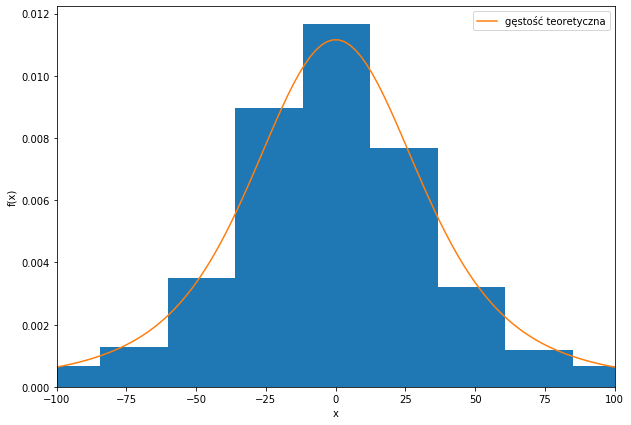

In [267]:
def inf_div_sqrt2():
    """Funkcja wyswietla histogram oraz wartość teoretyczną gęstości dla sumy 100 zmiennych losowych z rozkładu 
    stabilnego z parametrem alpha=\sqrt{2}"""
    sqrt2_simulation = alpha_stable_n(np.sqrt(2), 0, 0, 1, n=1000)
    for i in range(100):
        sqrt2_simulation = list(map(add, sqrt2_simulation, alpha_stable_n(np.sqrt(2), 0, 0, 1, n=1000)))
    plt.figure(figsize=(10, 7))
    plt.hist(sqrt2_simulation, bins=1000, density=True)
    x = np.linspace(-100, 100, 100)
    plt.plot(x, stats.levy_stable.pdf(x, np.sqrt(2), 0, scale=100**(1/np.sqrt(2))), label='gęstość teoretyczna')
    plt.xlim(-100, 100)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    return sqrt2_simulation

sqrt2_simulation = inf_div_sqrt2()

In [272]:
def inf_div_test_sqrt2(sqrt2_simulation):
    """Test K-S dla próbki z poprzedniej generacji"""
    sqrt2_divisible = []
    for i in range(10):
        sqrt2_divisible.append(1 if kstest(sqrt2_simulation, 'levy_stable', (np.sqrt(2), 0, 0, 100**(1/np.sqrt(2)))).pvalue > 0 else 0)
    display(Markdown(r'Test zgodności Kołgomorowa-Smirnowa dla $\alpha=\sqrt{}$  i  $\beta=0$. Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w {}% przypadków'.format(2, sum(sqrt2_divisible)*10)))
    
inf_div_test_sqrt2(sqrt2_simulation)

Test zgodności Kołgomorowa-Smirnowa dla $\alpha=\sqrt2$  i  $\beta=0$. Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w 100% przypadków

* Sprawdzenie nieskończonej podzielności dla rozkładu Lévy'ego

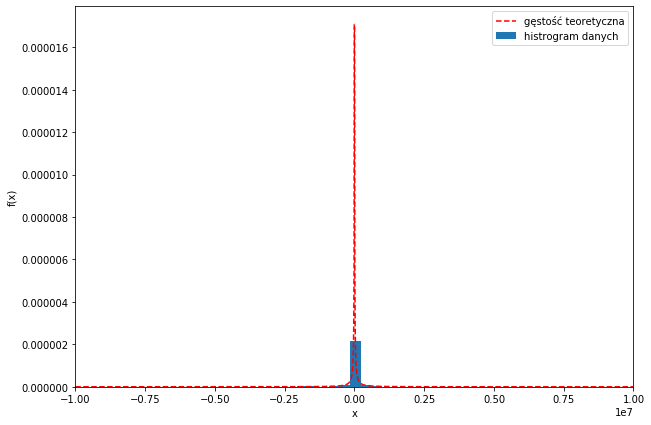

In [273]:
def inf_div_levy():
    """Funkcja wyswietla histogram oraz wartość teoretyczną gęstości dla sumy 100 zmiennych losowych z rozkładu 
    stabilnego z parametrem alpha=1/2"""
    levy_simulaton = alpha_stable_n(1/2, 0, 0, 1, n=1000)
    for i in range(100):
        levy_simulaton = list(map(add, levy_simulaton, alpha_stable_n(1/2, 0, 0, 1, n=1000)))
    x = np.linspace(-5*10**7, 5*10**7, 10000)
    plt.figure(figsize=(10, 7))
    plt.plot(x, stats.levy_stable.pdf(x, 1/2, 0, scale=100**(2)), 'r--', label='gęstość teoretyczna')
    plt.hist(levy_simulaton, bins=6000, density=True, label='histrogram danych')
    plt.xlim(-1*10**7, 1*10**7)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    return levy_simulaton

levy_simulaton = inf_div_levy()

In [274]:
def inf_div_test_levy(levy_simulaton):
    """Test K-S dla próbki z poprzedniej generacji"""
    levy_inf_divisible = []
    for i in range(10):
        levy_inf_divisible.append(1 if kstest(levy_simulaton, 'levy_stable', (1/2, 0, 0, 100**(2))).pvalue > 0 else 0)
    display(Markdown(r'Test zgodności Kołgomorowa-Smirnowa dla $\alpha={}$  i  $\beta=0$. Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w {}% przypadków'.format(r'\frac{1}{2}', sum(levy_inf_divisible)*10)))
    
inf_div_test_levy(levy_simulaton)

Test zgodności Kołgomorowa-Smirnowa dla $\alpha=\frac{1}{2}$  i  $\beta=0$. Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w 100% przypadków

* Sprawdzenie dla rozkładu $\alpha$-stabilnego $S(\frac{3}{2}, 0, 0, 1)$

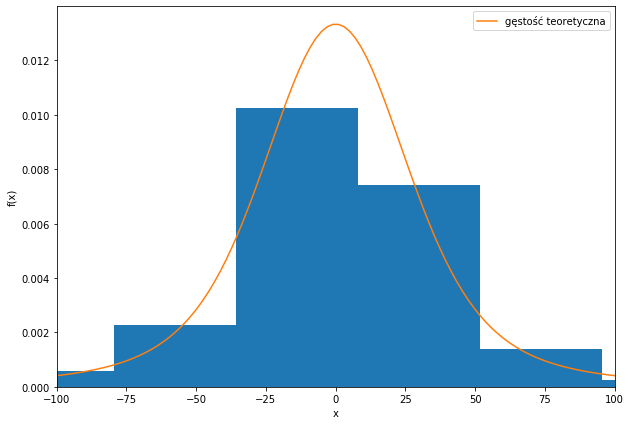

In [269]:
def inf_div_holtsmark():
    """Funkcja wyswietla histogram oraz wartość teoretyczną gęstości dla sumy 100 zmiennych losowych z rozkładu 
    stabilnego z parametrem alpha=3/2"""
    holtsmark_simulation = alpha_stable_n(3/2, 0, 0, 1, n=1000)
    for i in range(100):
        holtsmark_simulation = list(map(add, holtsmark_simulation, alpha_stable_n(3/2, 0, 0, 1, n=1000)))
    plt.figure(figsize=(10, 7))
    plt.hist(holtsmark_simulation, bins=200, density=True)
    x = np.linspace(-100, 100, 100)
    plt.plot(x, stats.levy_stable.pdf(x, 3/2, 0, scale=100**(2/3)), label='gęstość teoretyczna')
    plt.xlim(-100, 100)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    return holtsmark_simulation

holtsmark_simulation = inf_div_holtsmark()

In [270]:
def inf_div_test_holtsmark(holtsmark_simulation):
    """Test K-S dla próbki z poprzedniej generacji Holtsmarka"""
    holtsmark_inf_divisible = []
    for i in range(10):
        holtsmark_inf_divisible.append(1 if kstest(holtsmark_simulation, 'levy_stable', (3/2, 0, 0, 100**(2/3))).pvalue > 0 else 0)
    display(Markdown(r'Test zgodności Kołgomorowa-Smirnowa dla $\alpha={}$  i  $\beta=0$. Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w {}% przypadków'.format(r'\frac{3}{2}', sum(holtsmark_inf_divisible)*10)))
    
inf_div_test_holtsmark(holtsmark_simulation)

Test zgodności Kołgomorowa-Smirnowa dla $\alpha=\frac{3}{2}$  i  $\beta=0$. Badana próbka jest zgodna z rozkładem levy-stable dla danych parametrów w 100% przypadków

Zatem można stwierdzić, że podane rozkłady $\alpha$-stabilne są nieskończenie podzielne. Wynika to z faktu, ze przechodzą 10/10 testów Kołgomorowa-Smirnowa.

### Wnioski

Zaimplementowanie algorytmu oraz sprawdzenie jego poprawności nie było dużym wyzwaniem. Problemy wystąpiły przy symulacyjnym uzasadnieniu uogólnionego Centralnego Twierdzenia Granicznego, które najlepiej działało dla stu generacji zmiennych mimo, że z założenia powinno mieć najlepsze dopasowanie przy zdecydowanie większej liczbie generacji. Zdecydowanie jest to problem do głebszej analizy i poprawy danego algorytmu. Każda z wymaganych części zadania została zrealizowana, a wyniki skomentowane.

## Podsumowanie

Rozkłady $\alpha$-stabilne są ciekawym zagadnieniem, które znajdują zastosowania na wielu płaszczyznach. Zawarte w projekcie część teoretyczna oraz część symulacyjna łagodnie wprowadziły w owy złożony temat i będą dobrym punktem startowym do pogłębiania wiedzy oraz umiejętności, które z pewnością przydadzą się na dalszej drodze naukowej. Od pierwszego opisania rozkładów $\alpha$-stabilnych nie minęło nawet sto lat, zatem  jest to pole do badań i być może znalezienia nowych własności czy zastosowań.

## BIBLIOGRAFIA

[1] Przemysław Prętki: Rozkłady $\alpha$-stabilne w ewolucyjnych algorytmach globalnej optymalizacji parametrycznej., Zielona Góra, 13 luty 2008 http://zbc.uz.zgora.pl/Content/14669/HTML/PPretki_doktorat.pdf

[2] Agnieszka Jurlewicz: Wykład Rozkłady Stabilne. http://prac.im.pwr.wroc.pl/~agniesz/rachunek_prawd_MAT1332/files/R_Pr_MAP1181_wyklad13_rozklady_stabilne.pdf

[3]John P. Nolan:Stable Distributions. Models for Heavy-Tailed Data, American University, July 2014.  http://prac.im.pwr.edu.pl/~burnecki/chap1.pdf

[4]Paweł F. Góra: Wykład Fizyka Statystyczna, 2015. http://th-www.if.uj.edu.pl/zfs/gora/statystyczna15/wyklad01.pdf?fbclid=IwAR1ahpRkFvOrD8IgwQhkdS_-dW-nFPCSvCDAveKyaZ_4R8QHAG6GhWc1F8o

[5]Systems Innovation:Long Tailed Distributions, 2015. https://www.youtube.com/watch?v=vIp1kY0H0yw

[6]Evgeny Spodarev:Stable Distributions. Lecture Notes, Ulm University, 2016. https://www.uni-ulm.de/fileadmin/website_uni_ulm/mawi.inst.110/mitarbeiter/spodarev/publications/scripts/Stable_Distributions.pdf

[7]Szymon Borak, Wolfgang Härdle, Rafal Weron: Stable Distributions, 2005 http://prac.im.pwr.edu.pl/~hugo/publ/SFB2005-008_Borak_Haerdle_Weron.pdf

Projekt realizowany w ramach kursu Symulacje Komputerowe na kierunku Matematyka Stosowana, Wydział Matematyki Politechniki Wrocławskiej. 

Autorka: Nina Bury